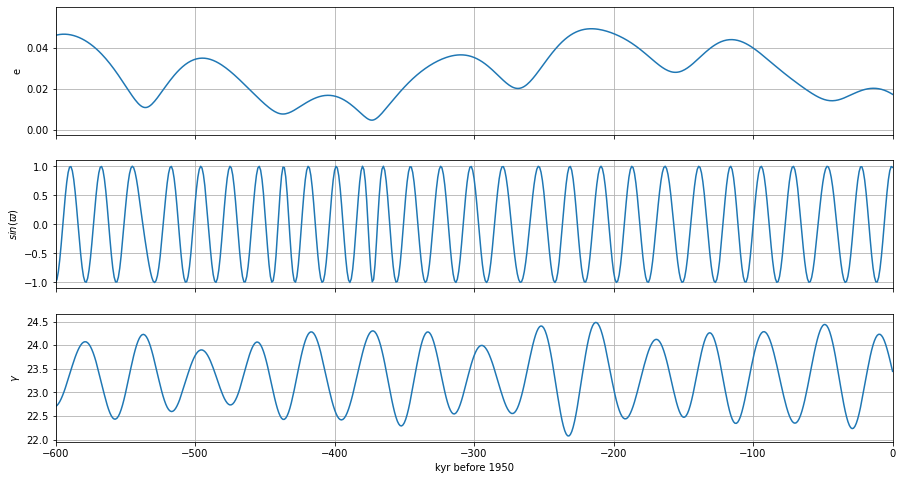

/Users/claresinger/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


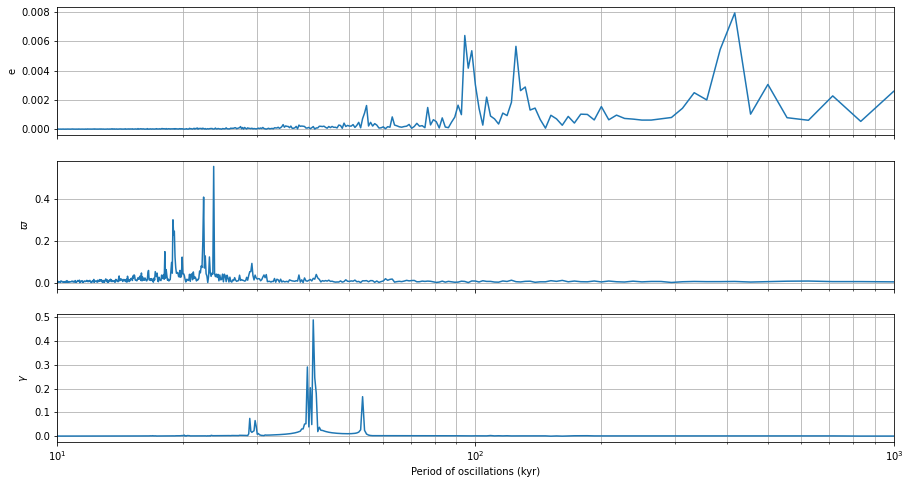

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# https://www.ncei.noaa.gov/pub/data/paleo/climate_forcing/orbital_variations/insolation/readme_insolation.txt

ds = np.loadtxt("orbit91.tsv", skiprows=2)
ds[:,2] = np.sin(np.unwrap(np.deg2rad(ds[:,2])))
labels = ["kyr before 1950", "e", "$sin(\\varpi)$", "$\\gamma$"]

fig,axes = plt.subplots(3,1,figsize=(15,8),sharex=True)
for i,ax in enumerate(axes):
    ax.plot(ds[:,0], ds[:,i+1])
    ax.set_ylabel(labels[i+1])
    ax.grid(which="both")
plt.xlabel(labels[0])
plt.xlim([-600,0])
plt.show()

x = np.abs(ds[:,0])
N = x.size
T = np.diff(x)[0]
xf = np.linspace(0.0, 1.0/(2*T), N//2)
period = 1/xf

labels = ["Period of oscillations (kyr)", "e", "$\\varpi$", "$\\gamma$"]
fig,axes = plt.subplots(3,1,figsize=(15,8), sharex=True)
for i,ax in enumerate(axes):
    y = ds[:,i+1]
    yf = scipy.fftpack.fft(y)
    ax.plot(period, 2.0/N * np.abs(yf[:N//2]))
    ax.set_xscale('log')
    ax.set_ylabel(labels[i+1])
    ax.grid(which="both")
plt.xlabel(labels[0])
plt.xlim([10,1000])
plt.show()